In [1]:
%load_ext autoreload
%autoreload 2

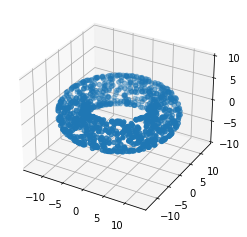

In [2]:
from pecan import data
import matplotlib.pyplot as plt
X = data.torus(1000,inner_radius=3,outer_radius=10) # make a 500 point torus
# visualize
fig = plt.figure()
ax = plt.subplot(projection='3d')
ax.set_zlim(-10,10)
ax.scatter(X[:,0],X[:,1],X[:,2])

In [3]:
# create diffusion matrix
import graphtools
G = graphtools.graphs.kNNGraph(X)

Calculating KNN search...


In [45]:
# eigendecompose P, for easier computation of the powers
import numpy as np
P_symmetric = G.diff_aff.toarray()
e, v = np.linalg.eigh(P_symmetric)
# eigendecomposition is faster with the symmetric diffusion operator, but we have to convert the evecs to P evecs by multiplying them by D^(-1/2) on the left.
D = np.sum(G.K.toarray(),axis=1)

In [46]:
x = np.array([[1,3],[4,9]])
np.sum(x,axis=1)

array([ 4, 13])

In [22]:
G.K.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [41]:
# get a different P, and manually obtain P_s
A = G.K.toarray()
P_s = np.diag(D**(-0.5)) @ P @ np.diag(D**(-0.5))
enew, v = np.linalg.eigh(P_s)

In [43]:
np.sum(D,axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [42]:
enew

array([-3.16163706e-01, -2.95791421e-01, -2.90529775e-01, -2.84766748e-01,
       -2.83738028e-01, -2.79582442e-01, -2.79293496e-01, -2.72738853e-01,
       -2.71294210e-01, -2.70958500e-01, -2.67836369e-01, -2.64765691e-01,
       -2.61900819e-01, -2.59845884e-01, -2.57155246e-01, -2.54068500e-01,
       -2.53890546e-01, -2.51287358e-01, -2.50394479e-01, -2.48950733e-01,
       -2.45806630e-01, -2.44104617e-01, -2.43942657e-01, -2.40724824e-01,
       -2.39430968e-01, -2.37989680e-01, -2.36535826e-01, -2.36020877e-01,
       -2.35149383e-01, -2.34584836e-01, -2.33597497e-01, -2.32636459e-01,
       -2.32512899e-01, -2.31748487e-01, -2.31003888e-01, -2.29617542e-01,
       -2.28105037e-01, -2.27301022e-01, -2.24183336e-01, -2.22766907e-01,
       -2.22659659e-01, -2.21572435e-01, -2.19851216e-01, -2.19217319e-01,
       -2.18283474e-01, -2.17978686e-01, -2.16734578e-01, -2.16106535e-01,
       -2.14594801e-01, -2.13969971e-01, -2.12526416e-01, -2.11557535e-01,
       -2.11385247e-01, -

In [25]:
np.allclose(P_s,P_s.T)

True

In [29]:
e,v = np.linalg.eig(G.P.toarray())
np.sort(e)

array([-3.16163706e-01+0.00000000e+00j, -2.95791421e-01+0.00000000e+00j,
       -2.90529775e-01+0.00000000e+00j, -2.84766748e-01+0.00000000e+00j,
       -2.83738028e-01+0.00000000e+00j, -2.79582442e-01+0.00000000e+00j,
       -2.79293496e-01+0.00000000e+00j, -2.72738853e-01+0.00000000e+00j,
       -2.71294210e-01+0.00000000e+00j, -2.70958500e-01+0.00000000e+00j,
       -2.67836369e-01+0.00000000e+00j, -2.64765691e-01+0.00000000e+00j,
       -2.61900819e-01+0.00000000e+00j, -2.59845884e-01+0.00000000e+00j,
       -2.57155246e-01+0.00000000e+00j, -2.54068500e-01+0.00000000e+00j,
       -2.53890546e-01+0.00000000e+00j, -2.51287358e-01+0.00000000e+00j,
       -2.50394479e-01+0.00000000e+00j, -2.48950733e-01+0.00000000e+00j,
       -2.45806630e-01+0.00000000e+00j, -2.44104617e-01+0.00000000e+00j,
       -2.43942657e-01+0.00000000e+00j, -2.40724824e-01+0.00000000e+00j,
       -2.39430968e-01+0.00000000e+00j, -2.37989680e-01+0.00000000e+00j,
       -2.36535826e-01+0.00000000e+00j, -2.36020877

In [6]:
# Find representation of the diagonal i of P as a function of the eigenvalues and eigenvectors
i = 42
v_i = v[:,i]
i_v = v[i]
coefs = np.multiply(v_i,i_v)
coefsa

array([-1.07318293e-13,  2.60179877e-09,  5.06327197e-07, -7.49762636e-09,
        4.18267401e-09, -8.88997839e-08, -2.81482017e-08,  7.29361562e-09,
       -8.95316758e-09, -2.77282338e-09,  1.48907564e-08, -7.34157637e-09,
        4.17468557e-09,  9.73473626e-11,  3.37014987e-08, -8.21231383e-06,
       -2.68587025e-07, -1.99722195e-03, -2.13709762e-03,  1.74043370e-07,
        2.44312969e-07,  4.06190154e-07,  1.82035131e-05,  3.04918807e-05,
       -1.80714426e-05, -2.21226989e-06,  4.81364038e-06,  3.28265933e-05,
       -6.30891383e-06, -9.51814718e-06, -9.87302113e-09, -3.99912903e-07,
       -3.13797308e-06,  3.92643162e-06,  7.81039878e-07,  1.90847598e-06,
        5.48353485e-04, -1.05476331e-03, -5.31650648e-06, -3.72905029e-05,
        4.80901639e-04, -6.80057083e-08,  8.92792774e-08,  9.98194231e-05,
       -8.11487390e-05,  2.59993483e-05, -7.94939162e-07,  1.40213535e-07,
       -1.19610900e-06, -2.82587284e-08,  3.87975888e-08, -1.86483297e-07,
        6.85221114e-06,  

In [27]:
enew

array([-3.16163706e-01, -2.95791421e-01, -2.90529775e-01, -2.84766748e-01,
       -2.83738028e-01, -2.79582442e-01, -2.79293496e-01, -2.72738853e-01,
       -2.71294210e-01, -2.70958500e-01, -2.67836369e-01, -2.64765691e-01,
       -2.61900819e-01, -2.59845884e-01, -2.57155246e-01, -2.54068500e-01,
       -2.53890546e-01, -2.51287358e-01, -2.50394479e-01, -2.48950733e-01,
       -2.45806630e-01, -2.44104617e-01, -2.43942657e-01, -2.40724824e-01,
       -2.39430968e-01, -2.37989680e-01, -2.36535826e-01, -2.36020877e-01,
       -2.35149383e-01, -2.34584836e-01, -2.33597497e-01, -2.32636459e-01,
       -2.32512899e-01, -2.31748487e-01, -2.31003888e-01, -2.29617542e-01,
       -2.28105037e-01, -2.27301022e-01, -2.24183336e-01, -2.22766907e-01,
       -2.22659659e-01, -2.21572435e-01, -2.19851216e-01, -2.19217319e-01,
       -2.18283474e-01, -2.17978686e-01, -2.16734578e-01, -2.16106535e-01,
       -2.14594801e-01, -2.13969971e-01, -2.12526416e-01, -2.11557535e-01,
       -2.11385247e-01, -